------------
INSTRUCTIONS
-------------

Run each cell from top to bottom. The final cell allows you to save an .mp4 movie of any animation you may have generated. Running the final cell is not mandatory, only do it if you generated movies that you want to save it. The movie will be saved to the folder where this code is stored.

If this is your first time running the code, type ctrl + F and then type r'C, this will take you to the parts of the code where an instruction to read a specific path in your computer is given. Make sure that the path exists in your computer and that it corresponds to the path where the file being specified can be found.

The "FIRST EXTREMUM" and "SECOND EXTREMUM" cells allow you to obtain a static representation of a specific normal mode's extrema.

------------
DESCRIPTIONS
-------------

**Coordinates file:** File containing the coordinates of the biomolecule which normal modes you wish to animate.

**Normal modes file:** File containing the normal modes of the biomolecule which normal modes you wish to animate.

**Available number of modes:** This output tells you how many normal modes can be animated.

**What mode do you want to animate?:** Choose the mode you wish to animate. You cannot animate the translational or rotational modes (modes 1 to 6) or a mode above the available number of modes.

**Graph scaling factor:** This is related to the size of the graph. A large number will result in a very small representation of the molecule, except when all coordinates of the molecule are positive numbers. Suggested value: 1.5.

**Maximum normalized value:** This is related to the arbitrary amplitude of motion in the animation. A small maximum normalized value will result in hardly perceivable motion, while a large maximum normalized value will result in clear motion. Suggested value: 100.

**Show axes?:** Type "yes" if you want to see the cartesian axes, otherwise type "no".

**Elevation (degrees):** Graph angle. Suggested value: 0.

**Azimuth (degrees):** Graph angle. Suggested value: 0.

**Node size:** How big do you want the nodes to be? Suggested value: 20 to 50 for small biomolecules (such as a single protein), 0.5 or 1 for bigger biomolecules (such as an entire viral capsid).

In [2]:
# LIBRARIES AND FUNCTIONS

# Libraries
print('\033[37m' + 'Importing libraries...'  + '\033[0m')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation
from pathlib import Path
import pandas as pd
import numpy as np
import os

print('\033[37m' + 'Defining functions...'  + '\033[0m')

# Integer validation
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
    return False

# String substraction
def substract(a, b):                              
    return "".join(a.rsplit(b))

print('\033[1m' + 'Done' + '\033[0m')

Importing libraries...
Defining functions...
Done


In [3]:
# FILES

# Coordinates file directory
CoordinatesFile = 0
while CoordinatesFile == 0:
    CoordinatesFile = input('\033[1m' + 'Coordinates file: ' + '\033[0')
    if 'coordinates' not in CoordinatesFile:
        CoordinatesFile = 0
        print('This is not a coordinates file')
    elif 'coordinates' in CoordinatesFile:
        CoordinatesFile = CoordinatesFile + '.csv'
        CoordinatesPath  = os.path.join(r'C:\Users\santi\Desktop\2019\Biophysics\Data', CoordinatesFile)
        if Path(CoordinatesPath).is_file():
            MoleculeName = substract(CoordinatesFile, '_coordinates.csv')
        else:
            CoordinatesFile = 0
            print('File not found')
print('\033[37m' + 'Retrieving coordinates...'  + '\033[0m')
df1 = pd.read_csv(CoordinatesPath)
df1.index = np.arange(1, len(df1) + 1)
df1.index.name = 'Node'
del df1['Unnamed: 0']
N = int(df1.shape[0]) # Number of atoms from coordinates file
# Equilibrium positions
x0 = np.zeros((N))
y0 = np.zeros((N))
z0 = np.zeros((N))
for i in range(0, N):
    x0[i] = df1['x0'][i+1]
    y0[i] = df1['y0'][i+1]
    z0[i] = df1['z0'][i+1]
            
# Normal modes file directory
NormalModesFile = 0
while NormalModesFile == 0:
    NormalModesFile = input('\033[1m' + 'Normal modes file: ' + '\033[0')
    if 'normalModes' not in NormalModesFile:
        NormalModesFile = 0
        print('This is not a normal modes file')
    elif 'normalModes' in NormalModesFile:
        NormalModesFile = NormalModesFile + '.csv'
        NormalModesPath  = os.path.join(r'C:\Users\santi\Desktop\2019\Biophysics\Data', NormalModesFile)
        if Path(NormalModesPath).is_file() == False:
            NormalModesFile = 0
            print('File not found')
print('\033[37m' + 'Retrieving normal modes...'  + '\033[0m')
df2 = pd.read_csv(NormalModesPath)
df2.index = np.arange(1, len(df2) + 1)
df2.index = ['x' + str(i) for i in range(1, N + 1)] + ['y' + str(i) for i in range(1, N + 1)] + ['z' + str(i) for i in range(1, N + 1)]
df2.index.name = 'Coordinate'
del df2['Coordinate']
HowMany = df2.shape[1] # Number of modes from normal modes file
Eigenvectors = np.zeros((3*N, HowMany))
Eigenvectors = df2.values # Eigenmatrix from normal modes file

print('\033[1m' + 'Done. ' + '\033[0m' + 'There are ' + '\033[1m' + str(HowMany) + '\033[0m' + ' modes available (from the lowest)')

Coordinates file: 1FOU_CG_coordinates
Retrieving coordinates...
Normal modes file: 1FOU_CG_100normalModes_cutoff20.0angstroms_kvariable_uniformMass116.0Da
Retrieving normal modes...
Done. There are 100 modes available (from the lowest)


What mode do you want to animate? 7
Graph scaling factor: 1.5
Maximum normalized value: 100
Show axes?: no
Elevation (degrees): 0
Azimuth (degrees): 0
Node size: 1
Defining normalized eigenmatrix...
Defining animation...


<IPython.core.display.Javascript object>


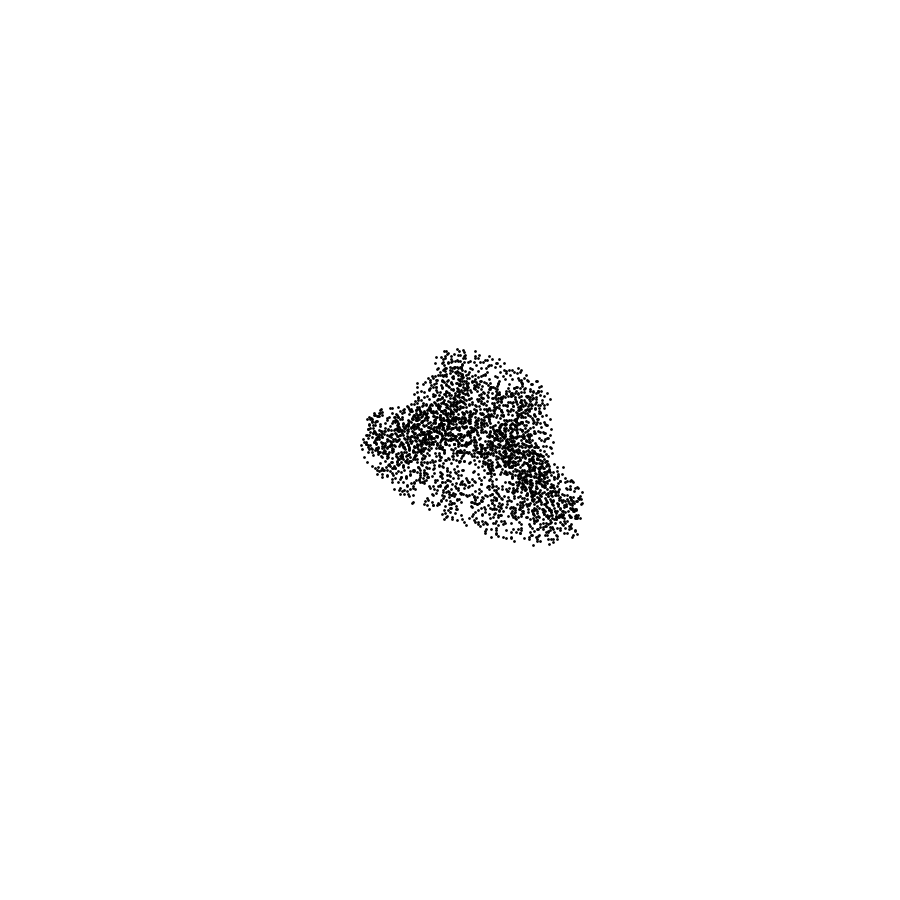

Done


In [4]:
# NORMAL MODE ANIMATION
    
# Enable dynamic graphs mode
%matplotlib nbagg
    
# Normal mode to animate
Mode = 0
while Mode == 0:
    Mode = input('\033[1m' + 'What mode do you want to animate? ' + '\033[0')
    if is_number(Mode) == True:
        if float(Mode) <= 0:
            Mode = 0
            print('Must be between 1 and ' + str(HowMany))
        elif float(Mode) > 3*N:
            Mode = 0
            print('Must be between 1 and ' + str(HowMany))
        else:
            if (float(Mode)).is_integer() == False:
                Mode = 0
                print('Must be an integer')
            else:
                Mode = int(Mode)
    else:
        Mode = 0
        print('Must be a number')
Mode = Mode - 1

# Axes scaling factor
ScalingFactor = 0
while ScalingFactor == 0:
    ScalingFactor = input('\033[1m' + 'Graph scaling factor: ' + '\033[0')
    if is_number(ScalingFactor) == True:
        if float(ScalingFactor) < 1:
            ScalingFactor = 0
            print('Scaling factor cannot be less than 1')
        else:
            ScalingFactor = float(ScalingFactor)
    else:
        ScalingFactor = 0
        print('Must be a number')

# Maximum normalized value
MaxNormalizedValue = 0
while MaxNormalizedValue == 0:
    MaxNormalizedValue = input('\033[1m' + 'Maximum normalized value: ' + '\033[0')
    if is_number(MaxNormalizedValue) == True:
        if float(MaxNormalizedValue) < 0:
            MaxNormalizedValue = 0
            print('Must be positive')
        elif float(MaxNormalizedValue) == 0:
            print('Maximum normalized value cannot be zero')
        else:
            MaxNormalizedValue = float(MaxNormalizedValue)
    else:
        MaxNormalizedValue = 0
        print('Must be a number')
        
# Show axes?
ShowAxes = 0
while ShowAxes == 0:
    ShowAxes = input('\033[1m' + 'Show axes?: ' + '\033[0')
    if ShowAxes not in ['yes', 'no']:
        ShowAxes = 0
        print('Answer must be yes or no')

# Initial angles
Angle1 = -1
Angle2 = -1
while Angle1 == -1:
    Angle1 = input('\033[1m' + 'Elevation (degrees): ' + '\033[0')
    if is_number(Angle1) == True:
        if float(Angle1) < 0:
            Angle1 = -1
            print('Must be positive')
        elif float(Angle1) > 360:
            Angle1 = -1
            print('Cannot be greater than 360°')
        else:
            Angle1 = float(Angle1)
    else:
        Angle1 = -1
        print('Must be a number')
while Angle2 == -1:
    Angle2 = input('\033[1m' + 'Azimuth (degrees): ' + '\033[0')
    if is_number(Angle2) == True:
        if float(Angle2) < 0:
            Angle2 = -1
            print('Must be positive')
        elif float(Angle2) > 360:
            Angle2 = -1
            print('Cannot be greater than 360°')
        else:
            Angle2 = float(Angle2)
    else:
        Angle2 = -1
        print('Must be a number')

# Marker size
MarkerSize = 0
while MarkerSize == -0:
    MarkerSize = input('\033[1m' + 'Node size: ' + '\033[0')
    if is_number(MarkerSize) == True:
        if float(MarkerSize) < 0:
            MarkerSize = 0
            print('Must be positive')
        elif float(MarkerSize) == 0:
            MarkerSize = 0
            print('Cannot be zero')
        elif float(MarkerSize) > 50:
            MarkerSize = 0
            print('Cannot be greater than 50')
        else:
            MarkerSize = float(MarkerSize)
    else:
        MarkerSize = 0
        print('Must be a number')
        
# Normalized eigenmatrix
print('\033[37m' + 'Defining normalized eigenmatrix...'  + '\033[0m')
NormalizedEigenvectors = np.zeros((3*N, HowMany))
Max = np.amax(Eigenvectors)
for i in range(0, 3*N):
    for j in range(0, HowMany):
        NormalizedEigenvectors[i,j] = Eigenvectors[i,j]*(MaxNormalizedValue/Max)
df3 = pd.DataFrame(NormalizedEigenvectors)
df3.index = ['x' + str(i) for i in range(1, N + 1)] + ['y' + str(i) for i in range(1, N + 1)] + ['z' + str(i) for i in range(1, N + 1)]
df3.index.name = 'Coordinate'
df3.columns = np.arange(1, HowMany + 1)
df3.columns.name = 'Mode number'

print('\033[37m' + 'Defining animation...'  + '\033[0m')
# Auxiliary arrays to avoid repetition of transpose function
AuxiliaryX = NormalizedEigenvectors[0:N, Mode] # First mode's normalized relative amplitudes of motion for x
AuxiliaryY = NormalizedEigenvectors[N:2*N, Mode] # First mode's normalized relative amplitudes of motion for y
AuxiliaryZ = NormalizedEigenvectors[2*N:3*N, Mode] # First mode's normalized relative amplitudes of motion for z
# Time array that counts from 0 to N, 5 times each (molecule goes from origin to extreme to origin to extreme to origin)
t = np.array([np.ones(N)*i for i in range(8)]).flatten()
# Vectors containing all the modified coordinates
x0Motion = np.zeros((8*N))
y0Motion = np.zeros((8*N))
z0Motion = np.zeros((8*N))
for i in range(0, N):
    x0Motion[i] = x0[i]
    y0Motion[i] = y0[i]
    z0Motion[i] = z0[i]
for i in range(N, 2*N):
    x0Motion[i] = x0[i-N] + (AuxiliaryX[i-N])/2
    y0Motion[i] = y0[i-N] + (AuxiliaryY[i-N])/2
    z0Motion[i] = z0[i-N] + (AuxiliaryZ[i-N])/2
for i in range(2*N, 3*N):
    x0Motion[i] = x0[i-2*N] + AuxiliaryX[i-2*N]
    y0Motion[i] = y0[i-2*N] + AuxiliaryY[i-2*N]
    z0Motion[i] = z0[i-2*N] + AuxiliaryZ[i-2*N]
for i in range(3*N, 4*N):
    x0Motion[i] = x0[i-3*N] + (AuxiliaryX[i-3*N])/2
    y0Motion[i] = y0[i-3*N] + (AuxiliaryY[i-3*N])/2
    z0Motion[i] = z0[i-3*N] + (AuxiliaryZ[i-3*N])/2
for i in range(4*N, 5*N):
    x0Motion[i] = x0[i-4*N]
    y0Motion[i] = y0[i-4*N]
    z0Motion[i] = z0[i-4*N]
for i in range(5*N, 6*N):
    x0Motion[i] = x0[i-5*N] - (AuxiliaryX[i-5*N])/2
    y0Motion[i] = y0[i-5*N] - (AuxiliaryY[i-5*N])/2
    z0Motion[i] = z0[i-5*N] - (AuxiliaryZ[i-5*N])/2
for i in range(6*N, 7*N):
    x0Motion[i] = x0[i-6*N] - AuxiliaryX[i-6*N]
    y0Motion[i] = y0[i-6*N] - AuxiliaryY[i-6*N]
    z0Motion[i] = z0[i-6*N] - AuxiliaryZ[i-6*N]
for i in range(7*N, 8*N):
    x0Motion[i] = x0[i-7*N] - (AuxiliaryX[i-7*N])/2
    y0Motion[i] = y0[i-7*N] - (AuxiliaryY[i-7*N])/2
    z0Motion[i] = z0[i-7*N] - (AuxiliaryZ[i-7*N])/2
df4 = pd.DataFrame({'time': t ,'x' : x0Motion, 'y' : y0Motion, 'z' : z0Motion}) # Dataframe containing all coordinates
# FuncAnimation function argument
def update_graph(num):
    data = df4[df4['time'] == num]
    graph.set_data (data.x, data.y)
    graph.set_3d_properties(data.z)
    return graph, 
# Build graph object
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(Angle1, Angle2) # Initial angle
# x-axis parameters
ax.set_xlabel('x (angstroms)')
xmin = np.amin(x0)
xmax = np.amax(x0)
if (xmin < 0 and xmax < 0) or (xmin < 0 and xmax > 0):
    ax.set_xlim(ScalingFactor*xmin, xmax+xmin*(1-ScalingFactor))
if xmin > 0 and xmax > 0:
    ax.set_xlim(xmin*(1-1/ScalingFactor), xmax+(1/ScalingFactor)*xmin)
# y-axis parameters
ax.set_ylabel('y (angstroms)')
ymin = np.amin(y0)
ymax = np.amax(y0)
if (ymin < 0 and ymax < 0) or (ymin < 0 and ymax > 0):
    ax.set_ylim(ScalingFactor*ymin, ymax+ymin*(1-ScalingFactor))
if ymin > 0 and ymax > 0:
    ax.set_ylim(ymin*(1-1/ScalingFactor), ymax+(1/ScalingFactor)*ymin)
# z-axis parameters
ax.set_zlabel('z (angstroms)')
zmin = np.amin(z0)
zmax = np.amax(z0)
if (zmin < 0 and zmax < 0) or (zmin < 0 and zmax > 0):
    ax.set_zlim(ScalingFactor*zmin, zmax+zmin*(1-ScalingFactor))
if zmin > 0 and zmax > 0:
    ax.set_zlim(zmin*(1-1/ScalingFactor), zmax+(1/ScalingFactor)*zmin)
# Show or hide axes
if ShowAxes == 'no':
    ax.set_axis_off()
elif ShowAxes == 'yes':
    ax.set_axis_on()
data = df4[df4['time'] == 0] # Initial dataset for the animated graph
graph, = ax.plot(data.x, data.y, data.z, linestyle = '', marker = 'o', color = 'black', markersize = MarkerSize) # Graph's main parameters
animation = matplotlib.animation.FuncAnimation(fig, update_graph, frames = 8, blit = True, interval = 200) # Generate animation
plt.show() # Show graph

print('\033[1m' + 'Done' + '\033[0m')

In [ ]:
# FIRST EXTREMUM

# Axes scaling factor
ScalingFactor = 0
while ScalingFactor == 0:
    ScalingFactor = input('\033[1m' + 'Graph scaling factor: ' + '\033[0')
    if is_number(ScalingFactor) == True:
        if float(ScalingFactor) < 0:
            ScalingFactor = 0
            print('Must be positive')
        elif float(ScalingFactor) == 0:
            ScalingFactor = 0
            print('Scaling factor cannot be zero')
        elif float(ScalingFactor) > 5:
            ScalingFactor = 0
            print('Scaling factor cannot be greater than 5')
        else:
            ScalingFactor = float(ScalingFactor)
    else:
        ScalingFactor = 0
        print('Must be a number')

# Show axes?
ShowAxes = 0
while ShowAxes == 0:
    ShowAxes = input('\033[1m' + 'Show axes? ' + '\033[0')
    if ShowAxes not in ['yes', 'no']:
        ShowAxes = 0
        print('Answer must be yes or no')

# Initial angles
Angle1 = -1
Angle2 = -1
while Angle1 == -1:
    Angle1 = input('\033[1m' + 'Angle 1 (degrees): ' + '\033[0')
    if is_number(Angle1) == True:
        if float(Angle1) < 0:
            Angle1 = -1
            print('Must be positive')
        elif float(Angle1) > 360:
            Angle1 = -1
            print('Cannot be greater than 360°')
        else:
            Angle1 = float(Angle1)
    else:
        Angle1 = -1
        print('Must be a number')
while Angle2 == -1:
    Angle2 = input('\033[1m' + 'Angle 2 (degrees): ' + '\033[0')
    if is_number(Angle2) == True:
        if float(Angle2) < 0:
            Angle2 = -1
            print('Must be positive')
        elif float(Angle2) > 360:
            Angle2 = -1
            print('Cannot be greater than 360°')
        else:
            Angle2 = float(Angle2)
    else:
        Angle2 = -1
        print('Must be a number')

# Marker size
MarkerSize = 0
while MarkerSize == -0:
    MarkerSize = input('\033[1m' + 'Node size: ' + '\033[0')
    if is_number(MarkerSize) == True:
        if float(MarkerSize) < 0:
            MarkerSize = 0
            print('Must be positive')
        elif float(MarkerSize) == 0:
            MarkerSize = 0
            print('Cannot be zero')
        elif float(MarkerSize) > 50:
            MarkerSize = 0
            print('Cannot be greater than 50')
        else:
            MarkerSize = float(MarkerSize)
    else:
        MarkerSize = 0
        print('Must be a number')

# First extremum graph
print('\033[37m' + 'Graphing first extremum of mode ' + str(Mode) + '...'  + '\033[0m')
fig2 = plt.figure(figsize = (9, 9)) # Build figure object
ax2 = fig2.add_subplot(111, projection = '3d')
ax2.scatter(x0Motion[2*N:3*N], y0Motion[2*N:3*N], z0Motion[2*N:3*N], c = 'black', s = MarkerSize, marker = 'o')
ax2.view_init(Angle1, Angle2) # Initial angle
# x-axis parameters
ax2.set_xlabel('x (angstroms)')
xmin = np.amin(x0)
xmax = np.amax(x0)
if (xmin < 0 and xmax < 0) or (xmin < 0 and xmax > 0):
    ax2.set_xlim(ScalingFactor*xmin, xmax+xmin*(1-ScalingFactor))
if xmin > 0 and xmax > 0:
    ax2.set_xlim(xmin*(1-1/ScalingFactor), xmax+(1/ScalingFactor)*xmin)
# y-axis parameters
ax2.set_ylabel('y (angstroms)')
ymin = np.amin(y0)
ymax = np.amax(y0)
if (ymin < 0 and ymax < 0) or (ymin < 0 and ymax > 0):
    ax2.set_ylim(ScalingFactor*ymin, ymax+ymin*(1-ScalingFactor))
if ymin > 0 and ymax > 0:
    ax2.set_ylim(ymin*(1-1/ScalingFactor), ymax+(1/ScalingFactor)*ymin)
# z-axis parameters
ax2.set_zlabel('z (angstroms)')
zmin = np.amin(z0)
zmax = np.amax(z0)
if (zmin < 0 and zmax < 0) or (zmin < 0 and zmax > 0):
    ax2.set_zlim(ScalingFactor*zmin, zmax+zmin*(1-ScalingFactor))
if zmin > 0 and zmax > 0:
    ax2.set_zlim(zmin*(1-1/ScalingFactor), zmax+(1/ScalingFactor)*zmin)
# Show or hide axes
if ShowAxes == 'no':
    ax2.set_axis_off()
elif ShowAxes == 'yes':
    ax2.set_axis_on()
plt.show() # Show graph

print('\033[1m' + 'Done' + '\033[0m')

In [ ]:
# SECOND EXTREMUM

# Axes scaling factor
ScalingFactor = 0
while ScalingFactor == 0:
    ScalingFactor = input('\033[1m' + 'Graph scaling factor: ' + '\033[0')
    if is_number(ScalingFactor) == True:
        if float(ScalingFactor) < 0:
            ScalingFactor = 0
            print('Must be positive')
        elif float(ScalingFactor) == 0:
            ScalingFactor = 0
            print('Scaling factor cannot be zero')
        elif float(ScalingFactor) > 5:
            ScalingFactor = 0
            print('Scaling factor cannot be greater than 5')
        else:
            ScalingFactor = float(ScalingFactor)
    else:
        ScalingFactor = 0
        print('Must be a number')

# Show axes?
ShowAxes = 0
while ShowAxes == 0:
    ShowAxes = input('\033[1m' + 'Show axes? ' + '\033[0')
    if ShowAxes not in ['yes', 'no']:
        ShowAxes = 0
        print('Answer must be yes or no')

# Initial angles
Angle1 = -1
Angle2 = -1
while Angle1 == -1:
    Angle1 = input('\033[1m' + 'Angle 1 (degrees): ' + '\033[0')
    if is_number(Angle1) == True:
        if float(Angle1) < 0:
            Angle1 = -1
            print('Must be positive')
        elif float(Angle1) > 360:
            Angle1 = -1
            print('Cannot be greater than 360°')
        else:
            Angle1 = float(Angle1)
    else:
        Angle1 = -1
        print('Must be a number')
while Angle2 == -1:
    Angle2 = input('\033[1m' + 'Angle 2 (degrees): ' + '\033[0')
    if is_number(Angle2) == True:
        if float(Angle2) < 0:
            Angle2 = -1
            print('Must be positive')
        elif float(Angle2) > 360:
            Angle2 = -1
            print('Cannot be greater than 360°')
        else:
            Angle2 = float(Angle2)
    else:
        Angle2 = -1
        print('Must be a number')  

# Marker size
MarkerSize = 0
while MarkerSize == -0:
    MarkerSize = input('\033[1m' + 'Node size: ' + '\033[0')
    if is_number(MarkerSize) == True:
        if float(MarkerSize) < 0:
            MarkerSize = 0
            print('Must be positive')
        elif float(MarkerSize) == 0:
            MarkerSize = 0
            print('Cannot be zero')
        elif float(MarkerSize) > 50:
            MarkerSize = 0
            print('Cannot be greater than 50')
        else:
            MarkerSize = float(MarkerSize)
    else:
        MarkerSize = 0
        print('Must be a number')

# Second extremum graph
print('\033[37m' + 'Graphing second extremum of mode ' + str(Mode) + '...'  + '\033[0m')
fig3 = plt.figure(figsize = (9, 9)) # Build figure object
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.scatter(x0Motion[6*N:7*N], y0Motion[6*N:7*N], z0Motion[6*N:7*N], c = 'black', s = MarkerSize, marker = 'o')
ax3.view_init(Angle1, Angle2) # Initial angle
# x-axis parameters
ax3.set_xlabel('x (angstroms)')
xmin = np.amin(x0)
xmax = np.amax(x0)
if (xmin < 0 and xmax < 0) or (xmin < 0 and xmax > 0):
    ax3.set_xlim(ScalingFactor*xmin, xmax+xmin*(1-ScalingFactor))
if xmin > 0 and xmax > 0:
    ax3.set_xlim(xmin*(1-1/ScalingFactor), xmax+(1/ScalingFactor)*xmin)
# y-axis parameters
ax3.set_ylabel('y (angstroms)')
ymin = np.amin(y0)
ymax = np.amax(y0)
if (ymin < 0 and ymax < 0) or (ymin < 0 and ymax > 0):
    ax3.set_ylim(ScalingFactor*ymin, ymax+ymin*(1-ScalingFactor))
if ymin > 0 and ymax > 0:
    ax3.set_ylim(ymin*(1-1/ScalingFactor), ymax+(1/ScalingFactor)*ymin)
# z-axis parameters
ax3.set_zlabel('z (angstroms)')
zmin = np.amin(z0)
zmax = np.amax(z0)
if (zmin < 0 and zmax < 0) or (zmin < 0 and zmax > 0):
    ax3.set_zlim(ScalingFactor*zmin, zmax+zmin*(1-ScalingFactor))
if zmin > 0 and zmax > 0:
    ax3.set_zlim(zmin*(1-1/ScalingFactor), zmax+(1/ScalingFactor)*zmin)
# Show or hide axes
if ShowAxes == 'no':
    ax3.set_axis_off()
elif ShowAxes == 'yes':
    ax3.set_axis_on()
plt.show() # Show graph

print('\033[1m' + 'Done' + '\033[0m')

In [ ]:
# SAVE ANIMATION

print('\033[37m' + 'Saving animation...'  + '\033[0m')
animation.save(MoleculeName + '_mode' + str(Mode + 1) + '_scaled' + str(MaxNormalizedValue) + '.mp4', writer = 'ffmpeg', fps = 10)
print('\033[1m' + 'Done' + '\033[0m')